# Fourier spectral analysis

In [18]:
from __future__ import division

%matplotlib inline

from IPython.display import display 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.signal
from scipy import stats
import sys
import xarray as xr

sys.path.append('../src/')
import utils

mpl.rcParams['legend.fontsize'] = 'small'

In [7]:
def detrend(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    y_trend = intercept + slope * x
    return y - y_trend

## Example 1: autospectrum

In [12]:
# creating x1 and x2 as a superposition of synthetic signals 
k = 2*np.pi/50
omega = [2*np.pi/150, 2*np.pi/75, 2*np.pi/20]
amps = [0.5, 1.0, 2.0]
x =  np.arange(1, 101, 1)
t = np.arange(1, 301, 1)

def make_wave(a, k, x0, om, t):
    return a * np.sin(k*x0 - om*t)

# Wavy signals
y = []
for a, x0, om in zip(amps, [x[0], x[16], x[69]], omega):
    y.append(make_wave(a, k, x0, om, t))

# Linear trend
y.append(0.01*t - 1)

# Total signal
y = np.array(y)
x1 = y.sum(axis=0)

# Subtract linear regression line
x2 = detrend(t, x1)


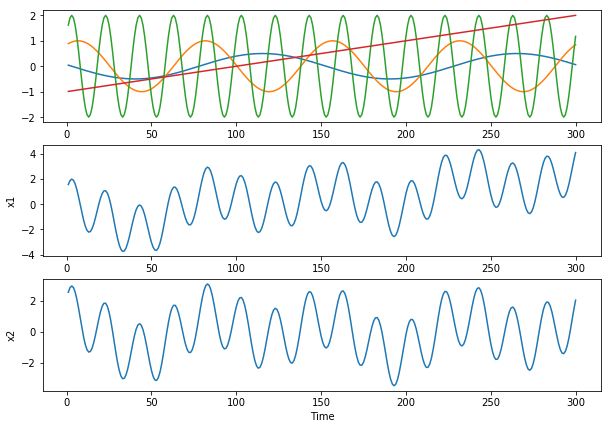

In [17]:
plt.figure(figsize=(10, 7))
nr, nc = 3, 1

plt.subplot(nr, nc, 1)
plt.plot(t, y.T)

plt.subplot(nr, nc, 2)
plt.plot(t, x1)
plt.ylabel('x1')

plt.subplot(nr, nc, 3)
plt.plot(t, x2)
plt.ylabel('x2')
plt.xlabel('Time')

In [23]:
f1, Pxx1 = scipy.signal.periodogram(x1)
f2, Pxx2 = scipy.signal.periodogram(x2)

In [20]:
f1.shape

(151,)

In [21]:
Pxx1.shape

(151,)

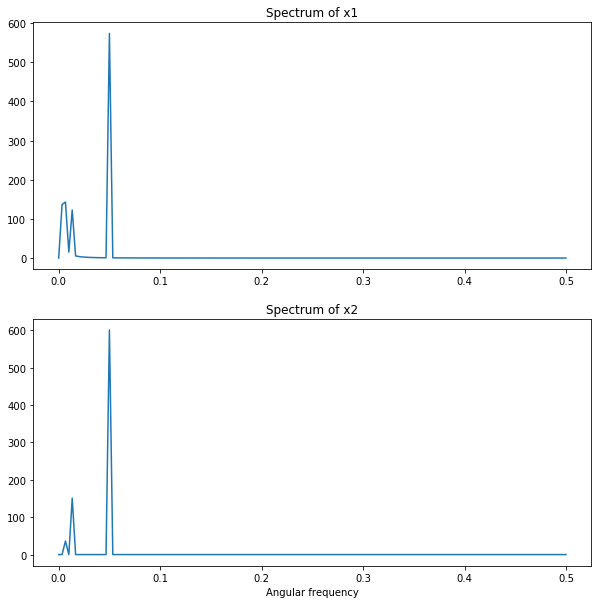

In [25]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(f1, Pxx1)
plt.title('Spectrum of x1')
plt.subplot(2, 1, 2)
plt.plot(f2, Pxx2)
plt.title('Spectrum of x2')
plt.xlabel('Angular frequency')

In [26]:
Pxx2[:10]

array([  6.11531548e-31,   4.64394905e-02,   3.61991166e+01,
         5.16145260e-03,   1.50662911e+02,   1.85921014e-03,
         1.29163753e-03,   9.49409377e-04,   7.27290392e-04,
         5.75006597e-04])